In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Uber Request Data.csv')

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [7]:
# Finding out the statistical summary for both numerical and object columns in one place
df.describe(include="all")

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 19:02,11/7/2016 13:00
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [8]:
# To check any null values present in the dataset
df.isnull().values.any()

True

In [9]:
# To check which columns has null values
df.isnull().any()

Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool

In [10]:
df.isnull()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6740,False,False,True,False,False,True
6741,False,False,True,False,False,True
6742,False,False,True,False,False,True
6743,False,False,True,False,False,True


In [11]:
# Check columns wise null value
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [12]:
# total numbers 0f null values present in the dataset
df.isnull().sum().sum()

6564

In [13]:
# Show the % of NaNs in each columns
df.isnull().sum()/len(df)*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [14]:
df.shape[0]

6745

In [15]:
len(df)

6745

### Cleaning/Handling the data
- We see that for the column "Request timestamp", the format of DateTime is different for different sections of data. Some have it separated by "-" and some have it separated by "/".
- Let us first replace the "/" with "-" to have uniformity and then convert the entier column to standard datatime format using "pd.to_datatime" function. Refer to lines 10,11 and 12.

In [16]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
12/7/2016 21:42        5
                      ..
15-07-2016 18:08:33    1
15-07-2016 04:50:54    1
14-07-2016 18:42:23    1
13-07-2016 19:26:50    1
15-07-2016 23:55:03    1
Name: Request timestamp, Length: 5618, dtype: int64

In [17]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [19]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"])

In [20]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [22]:
df["Drop timestamp"]

0      2016-11-07 13:00:00
1      2016-11-07 18:47:00
2      2016-12-07 09:58:00
3      2016-12-07 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [23]:
# Create req_hour column using fetching the hour number from the request timestamp
df['req_hour']=df["Request timestamp"].dt.hour 

In [24]:
#df["Request timestamp"].dt.time

In [25]:
#df["Request timestamp"].dt.minute

In [26]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23


In [27]:
 # Fetching the day number from the request timestampdf
df['req_day']=df["Request timestamp"].dt.day

In [28]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


# Note:
- The NaNs/missing values in the column "Driver_Id" can be ignored.
- This is because we see that since there were NO CARS AVAILABLE at point of the day after the user tried to book a cab, no driver was alloted the trip and hence the driver_id is empty.
- Similary, we can ignore the NaNs/missing values in the column "Drop timestamp" as for all of them, the trip is either CANCELLED or NO CARS AVAILABLE.
- In both the above cases, the data is missing due to a genuine reason and not that it got lost during data collection. Hence, I have not substitued them with any other values based on any logic.

# 3. Visualize and Analyse¶

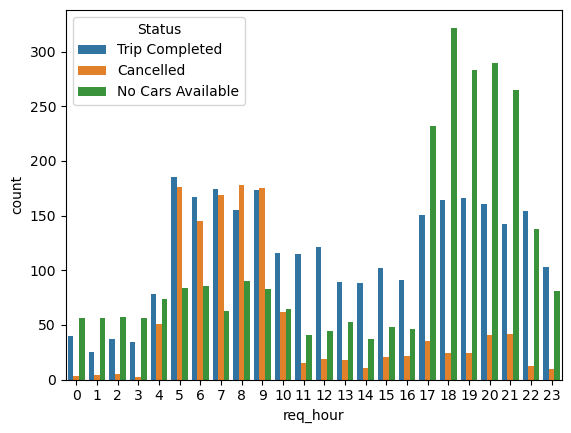

In [29]:
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

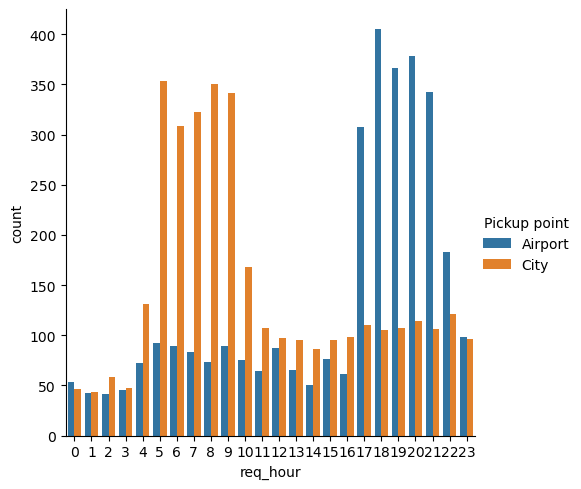

In [30]:
sns.catplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [31]:
df["Time_Slot"]=0

In [32]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


In [33]:
for i in df["req_hour"]:
    if df.iloc[i,6]<5:
        df.iloc[i,8]="Pre_Morning"
    elif 5<=df.iloc[i,6]<10:
        df.iloc[i,8]="Morning_Rush"
        
    elif 10<=df.iloc[i,6]<17:
        df.iloc[i,8]="Day_Time"
        
    elif 17<=df.iloc[i,6]<22:
        df.iloc[i,8]="Evening_Rush"
    else:
        df.iloc[i,8]="Late_Night"
    i=i+1


In [34]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Day_Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush


In [35]:
df["Time_Slot"].value_counts()

0               6721
Morning_Rush       8
Day_Time           7
Evening_Rush       7
Pre_Morning        1
Late_Night         1
Name: Time_Slot, dtype: int64

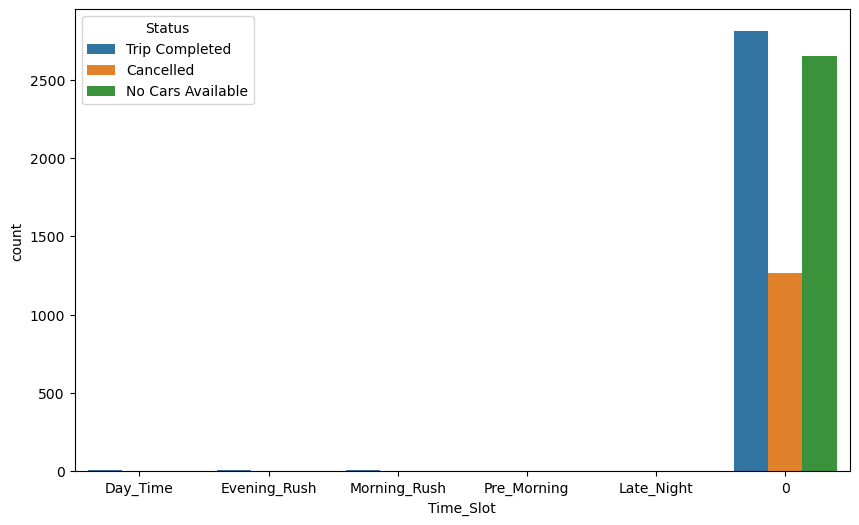

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

In [37]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']

In [38]:
df[df['Time_Slot']=='Morning_Rush']

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,Morning_Rush
10,1467,Airport,2.0,Trip Completed,2016-12-07 05:08:00,2016-12-07 06:02:00,5,7,Morning_Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning_Rush
23,3096,Airport,3.0,Trip Completed,2016-07-13 08:17:29,2016-07-13 09:22:37,8,13,Morning_Rush


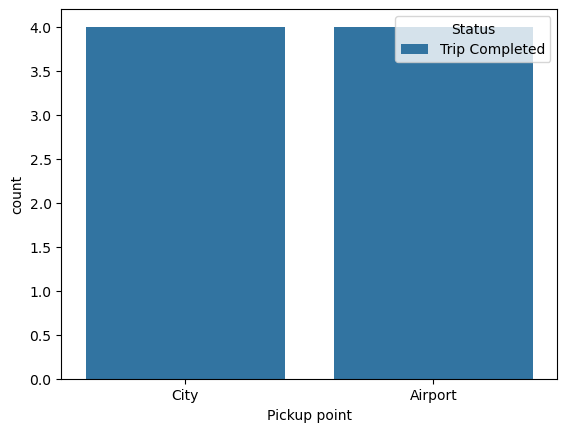

In [39]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)
plt.show()

In [40]:
# Pickup point= Airport

df_airport_cancelled=df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") &
                                         (df_morning_rush["Status"]=="Cancelled")]
len(df_airport_cancelled)

0

In [41]:
# Pickup point= City

df_city_cancelled=df_morning_rush[(df_morning_rush["Pickup point"]=="City") &
                                         (df_morning_rush["Status"]=="Cancelled")]
len(df_city_cancelled)

0

In [42]:
df_morning_rush[(df_morning_rush['Pickup point']=='City') & (df_morning_rush['Status']=='Trip Completed')].shape[0]

4

# Evening_rush

In [43]:
df_Evening_rush=df[df['Time_Slot']=='Evening_Rush']

In [44]:
df_Evening_rush[(df_Evening_rush['Pickup point']=='City') & (df_Evening_rush['Status']=='Cancelled')].shape[0]

0

In [45]:
df_Evening_rush['Status'].value_counts()

Trip Completed    7
Name: Status, dtype: int64

In [46]:
df_Evening_rush[(df_Evening_rush['Pickup point']=='Airport') & (df_Evening_rush['Status']=='Cancelled')].shape[0]

0